In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from MapManagerCore import MapAnnotations, MultiImageLoader, MMapLoader
import matplotlib.pyplot as plt

In [2]:
# Create an image loader
loader = MultiImageLoader(
    lineSegments="./data/rr30a_s0u/line_segments.csv",
    points="./data/rr30a_s0u/points.csv")

# add image channels to the loader
loader.read("./data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0)
loader.read("./data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1)

# Create the annotation map
map = MapAnnotations(loader)

map.table()

# save the annotation map
map.save("./data/rr30a_s0us.mmap")

In [3]:
# loading the map manager from zarr.
map = MapAnnotations(MMapLoader("./data/rr30a_s0us.mmap").cached())

In [4]:
map.table()

,Spine ID,Segment ID,x,y,z,Anchor X,Anchor Y,Anchor Z,Spine Length,X Background Offset,...,ROI Head Extend,Radius,Roi Channel 0 (sum),Roi Channel 0 (mean),Roi Channel 1 (sum),Roi Channel 1 (mean),Bg Roi Channel 0 (sum),Bg Roi Channel 0 (mean),Bg Roi Channel 1 (sum),Bg Roi Channel 1 (mean)
spineID,,,,,,,,,,,,,,,,,,,,,
0,0,0,431.0,239.0,31.0,425.0,225.4,31.0,14.86,21.0,...,4,4.0,12063.0,45.866920,6079.0,23.114068,14805.0,56.292776,5670.0,21.558935
1,1,0,382.0,250.0,31.0,378.0,236.0,31.0,14.56,21.0,...,4,4.0,15488.0,57.576208,7059.0,26.241636,14591.0,54.241636,10794.0,40.126394
2,2,0,416.0,245.0,31.0,414.0,228.0,31.0,17.12,21.0,...,4,4.0,12952.0,56.807018,6068.0,26.614035,13906.0,60.991228,7172.0,31.456140
3,3,0,447.0,231.0,31.0,444.0,218.1,31.0,13.24,21.0,...,4,4.0,20369.0,57.702550,8418.0,23.847025,22868.0,64.781870,7561.0,21.419263
4,4,0,486.0,229.0,31.0,477.0,213.0,31.0,18.36,21.0,...,4,4.0,14926.0,52.742049,6251.0,22.088339,18333.0,64.780919,6634.0,23.441696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,4,171.0,362.0,29.8,184.9,357.1,29.8,14.74,14.0,...,4,4.0,13609.0,56.468880,8930.0,37.053942,13138.0,54.514523,7296.0,30.273859
135,135,4,236.0,420.0,29.0,220.2,419.9,29.0,15.80,-21.0,...,4,4.0,177970.0,529.672619,190179.0,566.008929,230887.0,687.163690,498664.0,1484.119048
136,136,4,253.0,486.0,28.0,242.0,487.0,28.0,11.05,-14.0,...,4,4.0,12487.0,51.176230,6462.0,26.483607,11029.0,45.200820,7839.0,32.127049


In [5]:
# id = map.addSpine(segmentId="1", x=1,y=2,z=3)
# map.moveAnchor(spineId=id, x=1, y=1, z=3)
# map.moveSpine(spineId=id, x=1, y=1, z=3)
# map.deleteSpine(id)
# map.undo()
# map.redo()
# map.updateSpine(id=id, value={
#   "x": 1,
# })
# map.undo()
# map.translateBackgroundRoi()
# map.deleteSegment("")


In [6]:
map.segments().get_coordinates(include_z=True)

,x,y,z
segmentID,,,
0,354.0,240.0,31.000
0,359.0,240.0,31.000
0,363.0,236.0,31.000
0,391.0,236.0,31.000
0,395.0,232.0,31.000
...,...,...,...
4,241.0,479.0,28.222
4,242.0,487.0,28.111
4,245.0,492.0,28.000


In [7]:
map.segmentsLeft().get_coordinates()
map.segmentsRight().get_coordinates()

,x,y
segmentID,,
0,354.000000,236.000000
0,357.343146,236.000000
0,360.171573,233.171573
0,360.777719,232.674122
0,361.469266,232.304482
...,...,...
4,248.743193,490.589856
4,248.935275,491.283331
4,249.000000,492.000000


In [8]:
map.roi().get_coordinates()

,x,y
spineID,,
0,431.036201,228.863455
0,431.399375,228.747232
0,431.749832,228.596955
0,432.084387,228.413990
0,432.400000,228.200000
...,...,...
138,172.684806,323.027952
138,172.185444,320.531142
138,164.340799,322.100071


In [9]:
map.roiBase().get_coordinates()

,x,y
spineID,,
0,430.284988,228.989835
0,430.663610,228.944569
0,431.036201,228.863455
0,431.399375,228.747232
0,431.749832,228.596955
...,...,...
138,174.828427,325.171573
138,172.684806,323.027952
138,172.185444,320.531142


In [10]:
slices = map.slices(time=0, channel=0, zRange=(18, 36))

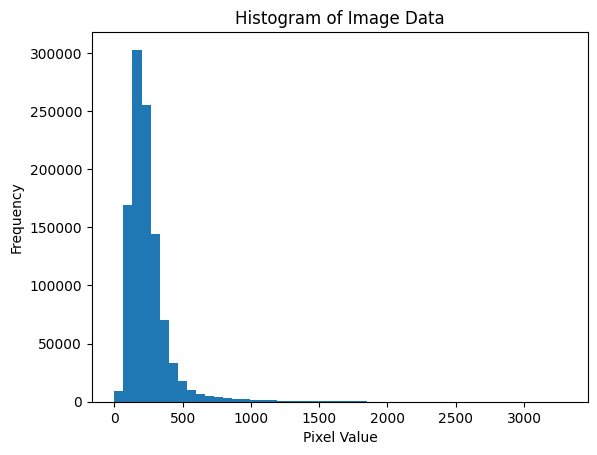

In [11]:
plt.hist(slices.data(), bins=50)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Image Data')
plt.show()

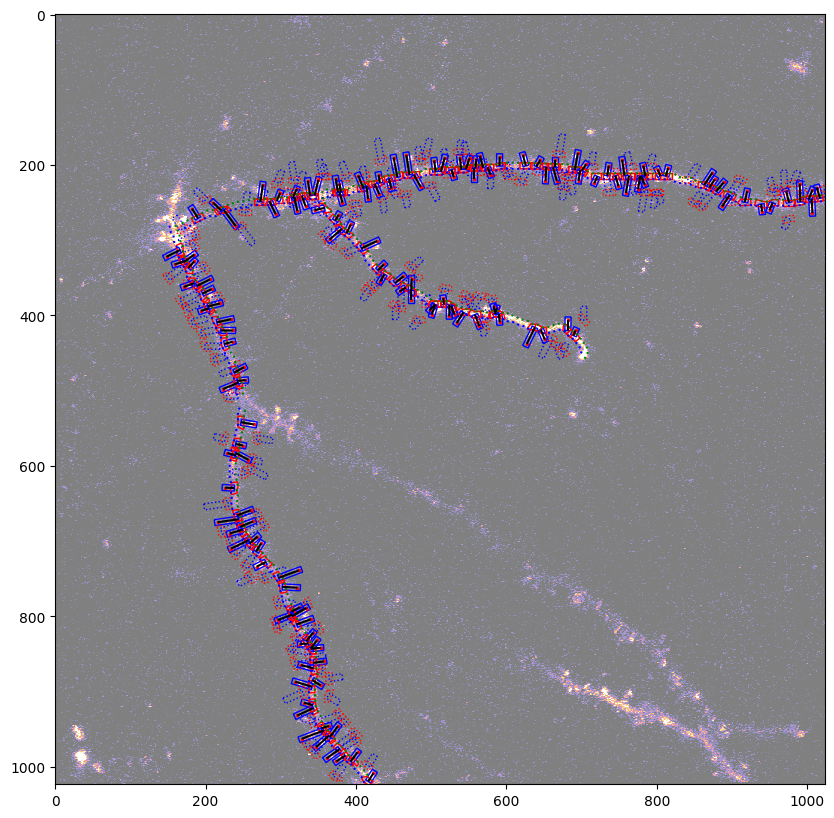

In [12]:

fig, ax = plt.subplots(figsize=(10, 10))

map.segmentsLeft().plot(color='blue', linestyle='dotted', ax=ax)
map.segmentsRight().plot(color='green', linestyle='dotted', ax=ax)

map.anchors().plot(color='black', ax=ax)
map.points().plot(color='red', marker='o', markersize=2, ax=ax)

map.roiHead().plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map.roiHeadBg().plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map.roiBase().plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map.roiBaseBg().plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [13]:
map["z"].between(10, 40)

spineID
0      True
1      True
2      True
3      True
4      True
       ... 
134    True
135    True
136    True
137    True
138    True
Name: z, Length: 139, dtype: bool

In [14]:
filtered = map.filter(map["z"].between(10, 40))

In [15]:
filtered.table()

,Spine ID,Segment ID,x,y,z,Anchor X,Anchor Y,Anchor Z,Spine Length,X Background Offset,...,ROI Head Extend,Radius,Roi Channel 0 (sum),Roi Channel 0 (mean),Roi Channel 1 (sum),Roi Channel 1 (mean),Bg Roi Channel 0 (sum),Bg Roi Channel 0 (mean),Bg Roi Channel 1 (sum),Bg Roi Channel 1 (mean)
spineID,,,,,,,,,,,,,,,,,,,,,
0,0,0,431.0,239.0,31.0,425.0,225.4,31.0,14.86,21.0,...,4,4.0,12063.0,45.866920,6079.0,23.114068,14805.0,56.292776,5670.0,21.558935
1,1,0,382.0,250.0,31.0,378.0,236.0,31.0,14.56,21.0,...,4,4.0,15488.0,57.576208,7059.0,26.241636,14591.0,54.241636,10794.0,40.126394
2,2,0,416.0,245.0,31.0,414.0,228.0,31.0,17.12,21.0,...,4,4.0,12952.0,56.807018,6068.0,26.614035,13906.0,60.991228,7172.0,31.456140
3,3,0,447.0,231.0,31.0,444.0,218.1,31.0,13.24,21.0,...,4,4.0,20369.0,57.702550,8418.0,23.847025,22868.0,64.781870,7561.0,21.419263
4,4,0,486.0,229.0,31.0,477.0,213.0,31.0,18.36,21.0,...,4,4.0,14926.0,52.742049,6251.0,22.088339,18333.0,64.780919,6634.0,23.441696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,4,171.0,362.0,29.8,184.9,357.1,29.8,14.74,14.0,...,4,4.0,13609.0,56.468880,8930.0,37.053942,13138.0,54.514523,7296.0,30.273859
135,135,4,236.0,420.0,29.0,220.2,419.9,29.0,15.80,-21.0,...,4,4.0,177970.0,529.672619,190179.0,566.008929,230887.0,687.163690,498664.0,1484.119048
136,136,4,253.0,486.0,28.0,242.0,487.0,28.0,11.05,-14.0,...,4,4.0,12487.0,51.176230,6462.0,26.483607,11029.0,45.200820,7839.0,32.127049


In [16]:
filtered.table()

,Spine ID,Segment ID,x,y,z,Anchor X,Anchor Y,Anchor Z,Spine Length,X Background Offset,...,ROI Head Extend,Radius,Roi Channel 0 (sum),Roi Channel 0 (mean),Roi Channel 1 (sum),Roi Channel 1 (mean),Bg Roi Channel 0 (sum),Bg Roi Channel 0 (mean),Bg Roi Channel 1 (sum),Bg Roi Channel 1 (mean)
spineID,,,,,,,,,,,,,,,,,,,,,
0,0,0,431.0,239.0,31.0,425.0,225.4,31.0,14.86,21.0,...,4,4.0,12063.0,45.866920,6079.0,23.114068,14805.0,56.292776,5670.0,21.558935
1,1,0,382.0,250.0,31.0,378.0,236.0,31.0,14.56,21.0,...,4,4.0,15488.0,57.576208,7059.0,26.241636,14591.0,54.241636,10794.0,40.126394
2,2,0,416.0,245.0,31.0,414.0,228.0,31.0,17.12,21.0,...,4,4.0,12952.0,56.807018,6068.0,26.614035,13906.0,60.991228,7172.0,31.456140
3,3,0,447.0,231.0,31.0,444.0,218.1,31.0,13.24,21.0,...,4,4.0,20369.0,57.702550,8418.0,23.847025,22868.0,64.781870,7561.0,21.419263
4,4,0,486.0,229.0,31.0,477.0,213.0,31.0,18.36,21.0,...,4,4.0,14926.0,52.742049,6251.0,22.088339,18333.0,64.780919,6634.0,23.441696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,4,171.0,362.0,29.8,184.9,357.1,29.8,14.74,14.0,...,4,4.0,13609.0,56.468880,8930.0,37.053942,13138.0,54.514523,7296.0,30.273859
135,135,4,236.0,420.0,29.0,220.2,419.9,29.0,15.80,-21.0,...,4,4.0,177970.0,529.672619,190179.0,566.008929,230887.0,687.163690,498664.0,1484.119048
136,136,4,253.0,486.0,28.0,242.0,487.0,28.0,11.05,-14.0,...,4,4.0,12487.0,51.176230,6462.0,26.483607,11029.0,45.200820,7839.0,32.127049


In [17]:
filtered.table()

,Spine ID,Segment ID,x,y,z,Anchor X,Anchor Y,Anchor Z,Spine Length,X Background Offset,...,ROI Head Extend,Radius,Roi Channel 0 (sum),Roi Channel 0 (mean),Roi Channel 1 (sum),Roi Channel 1 (mean),Bg Roi Channel 0 (sum),Bg Roi Channel 0 (mean),Bg Roi Channel 1 (sum),Bg Roi Channel 1 (mean)
spineID,,,,,,,,,,,,,,,,,,,,,
0,0,0,431.0,239.0,31.0,425.0,225.4,31.0,14.86,21.0,...,4,4.0,12063.0,45.866920,6079.0,23.114068,14805.0,56.292776,5670.0,21.558935
1,1,0,382.0,250.0,31.0,378.0,236.0,31.0,14.56,21.0,...,4,4.0,15488.0,57.576208,7059.0,26.241636,14591.0,54.241636,10794.0,40.126394
2,2,0,416.0,245.0,31.0,414.0,228.0,31.0,17.12,21.0,...,4,4.0,12952.0,56.807018,6068.0,26.614035,13906.0,60.991228,7172.0,31.456140
3,3,0,447.0,231.0,31.0,444.0,218.1,31.0,13.24,21.0,...,4,4.0,20369.0,57.702550,8418.0,23.847025,22868.0,64.781870,7561.0,21.419263
4,4,0,486.0,229.0,31.0,477.0,213.0,31.0,18.36,21.0,...,4,4.0,14926.0,52.742049,6251.0,22.088339,18333.0,64.780919,6634.0,23.441696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,4,171.0,362.0,29.8,184.9,357.1,29.8,14.74,14.0,...,4,4.0,13609.0,56.468880,8930.0,37.053942,13138.0,54.514523,7296.0,30.273859
135,135,4,236.0,420.0,29.0,220.2,419.9,29.0,15.80,-21.0,...,4,4.0,177970.0,529.672619,190179.0,566.008929,230887.0,687.163690,498664.0,1484.119048
136,136,4,253.0,486.0,28.0,242.0,487.0,28.0,11.05,-14.0,...,4,4.0,12487.0,51.176230,6462.0,26.483607,11029.0,45.200820,7839.0,32.127049


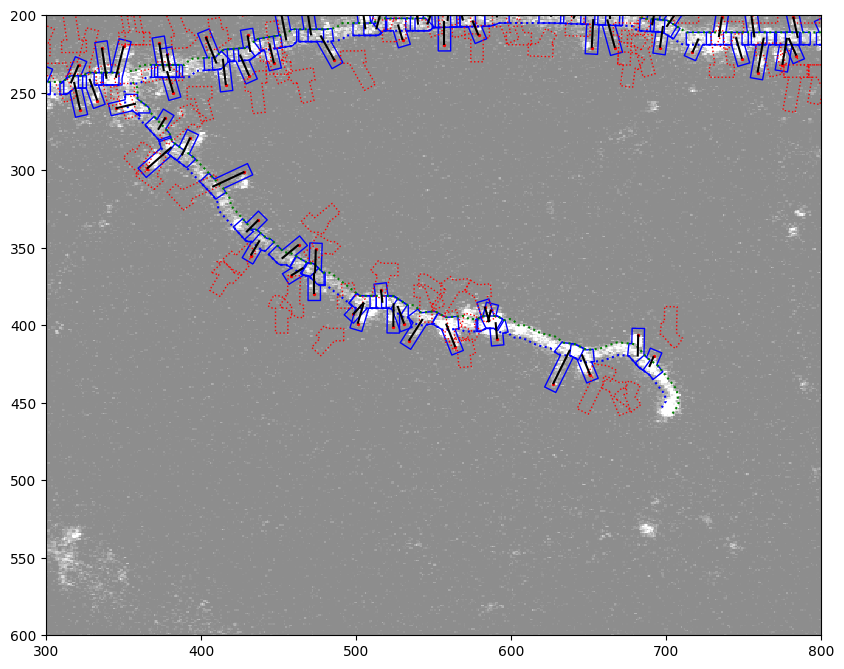

In [18]:
slices = filtered.slices(time=0, channel=0)

fig, ax = plt.subplots(figsize=(10, 10))

filtered.segmentsLeft().plot(color='blue', linestyle='dotted', ax=ax)
filtered.segmentsRight().plot(color='green', linestyle='dotted', ax=ax)

filtered.anchors().plot(color='black', ax=ax)
filtered.points().plot(color='red', marker='o', markersize=2, ax=ax)

filtered.roi().plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
filtered.roiBg().plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.45, cmap='gray')

# Set x and y limits
ax.set_xlim(300, 800)
ax.set_ylim(600, 200)

plt.show()

In [19]:
layers = filtered.getAnnotations(options={
    "selection": {
      "t": 0,
      "z": (18, 36)
    },
    "annotationSelections": {
      "segmentIDEditing": None,
      "segmentID": None,
      "spineID": None
    },
    "showLineSegments": True,
    "showAnchors": True,
    "showLabels": True,
    "showLineSegmentsRadius": True,
    "showSpines": True,
  },
)

for layer in layers:
    coords, props = layer.coordinates()
    print("Properties:", props, "\n coords:", coords.head(2), "\n\n")

Properties: {'id': 'segment-left', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x108308d60>, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x12b426b60>} 
 coords:              x      y
id                   
0   354.000000  232.0
0   355.686292  232.0 


Properties: {'id': 'segment-right', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x108308d60>, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.offset at 0x12af03380>} 
 coords:         x      y
id              
0   354.0  248.0
0   359.0  248.0 


Properties: {'id': 'segment-interaction', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': [0, 0, 0, 0], 'strokeWidth': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x12b4882c0>, 'fixed': True} 
 coords:         x      y
id           